In [34]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate
from scipy import integrate

from matplotlib.colors import LogNorm

In [2]:
class Neutrino_Info:
    def __init__(self):
        """
        Fill the empty variables. 
        """
        self.Energy     = np.array([])
        
        self.Flux_numu  = np.array([])
        self.Flux_numub = np.array([])
        self.Flux_nue   = np.array([])
        
        self.XS_IBD     = np.array([])
        self.XS_nue_e   = np.array([])
        self.XS_nueb_e  = np.array([])
        self.XS_nux_e   = np.array([])
        self.XS_nuxb_e  = np.array([])
        self.XS_CNC     = np.array([])
        self.XS_nue_Ar  = np.array([])
        
        self.Timing     = np.array([])
        self.T_mu       = np.array([])
        self.T_e_mub    = np.array([])

In [3]:
Nu_Info = np.load("Neutrino_Info.npy").item()

In [4]:
### To calculate the number of target nucleons I need the molar mass of argon (39.948 g/mol)
### The number of grams of argon (size of the target = density x volume) density = 1.3954 g/cm^3
### Avagodro's number 6.022e+23 particles / mol
### And I will assume the detector is 1 cubic meter in size

# N_Targets = (Part / mol) x (mol / g) x (g / cm^3) x (cm^3 / m^3)
N_Targets = 6.022e+23 * (1/39.948) * (1.3954) * (1000000)

In [5]:
# EventRate_ElectronNu = y_ENu_Flux * N_Targets * Electron_Neutrino_CrossSection
# EventRate_AntiMuNu = y_aMuNu_Flux * N_Targets * AntiMu_Neutrino_CrossSection


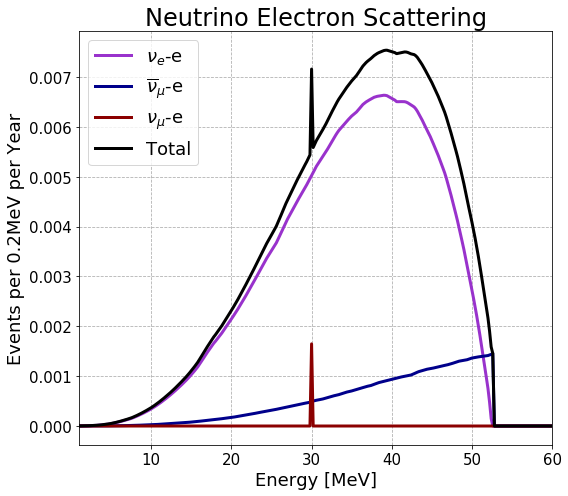

Events per Year --> 0.965


In [6]:
R_nue   = Nu_Info.Flux_nue   * N_Targets * Nu_Info.XS_nue_e
R_numub = Nu_Info.Flux_numub * N_Targets * Nu_Info.XS_nuxb_e
R_numu  = Nu_Info.Flux_numu  * N_Targets * Nu_Info.XS_nux_e
Yr = 365

plt.figure(figsize=(8,7))
plt.title("Neutrino Electron Scattering", fontsize=24)

plt.plot(Nu_Info.Energy, R_nue*Yr,   label=r"$\nu_e$-e", lw=3, color='darkorchid')
plt.plot(Nu_Info.Energy, R_numub*Yr, label=r"$\overline{\nu}_\mu$-e", lw=3, color='darkblue')
plt.plot(Nu_Info.Energy, R_numu*Yr,  label=r"${\nu}_\mu$-e", lw=3, color='darkred')

total = R_nue*Yr+R_numub*Yr+R_numu*Yr
plt.plot(Nu_Info.Energy, total, label=r"Total", color='k', lw=3)


plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.xlabel('Energy [MeV]',fontsize=18)
plt.ylabel(r'Events per 0.2MeV per Year',fontsize=18)

plt.xlim(1,60)
plt.tight_layout()
# plt.savefig("Nu_electron_scattering.pdf")
plt.show()
print("Events per Year --> {:.3f}".format(total.sum()))


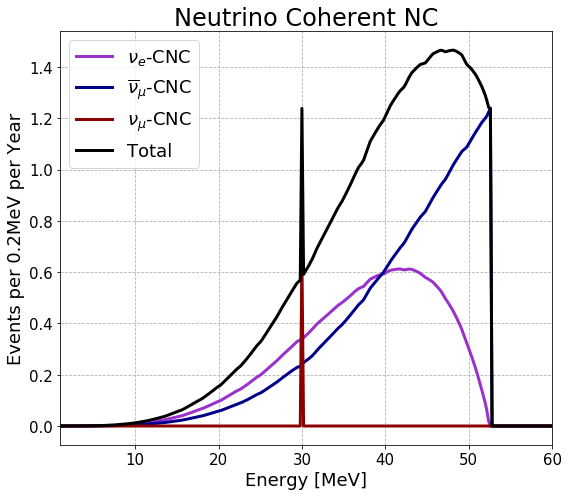

Events per Year --> 153.525


Events per Year nue --> 65.609
Events per Year numub --> 87.255
Events per Year numu --> 0.661


In [7]:
R_CNC1   = Nu_Info.Flux_numu  * N_Targets * Nu_Info.XS_CNC
R_CNC2   = Nu_Info.Flux_numub  * N_Targets * Nu_Info.XS_CNC
R_CNC3   = Nu_Info.Flux_nue  * N_Targets * Nu_Info.XS_CNC

Yr = 365

plt.figure(figsize=(8,7))
plt.title("Neutrino Coherent NC", fontsize=24)

plt.plot(Nu_Info.Energy, R_CNC3*Yr,   label=r"$\nu_e$-CNC", lw=3, color='darkorchid')
plt.plot(Nu_Info.Energy, R_CNC2*Yr, label=r"$\overline{\nu}_\mu$-CNC", lw=3, color='darkblue')
plt.plot(Nu_Info.Energy, R_CNC1*Yr,  label=r"${\nu}_\mu$-CNC", lw=3, color='darkred')

total = (R_CNC1+R_CNC2+R_CNC3)*Yr
plt.plot(Nu_Info.Energy, total, label=r"Total", color='k', lw=3)


plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.xlabel('Energy [MeV]',fontsize=18)
plt.ylabel(r'Events per 0.2MeV per Year',fontsize=18)

plt.xlim(1,60)
plt.tight_layout()
# plt.savefig("Nu_Coherent_NC.pdf")
plt.show()
print("Events per Year --> {:.3f}".format(total.sum()))
print("\n")
print("Events per Year nue --> {:.3f}".format((R_CNC3*Yr).sum()))
print("Events per Year numub --> {:.3f}".format((R_CNC2*Yr).sum()))
print("Events per Year numu --> {:.3f}".format((R_CNC1*Yr).sum()))



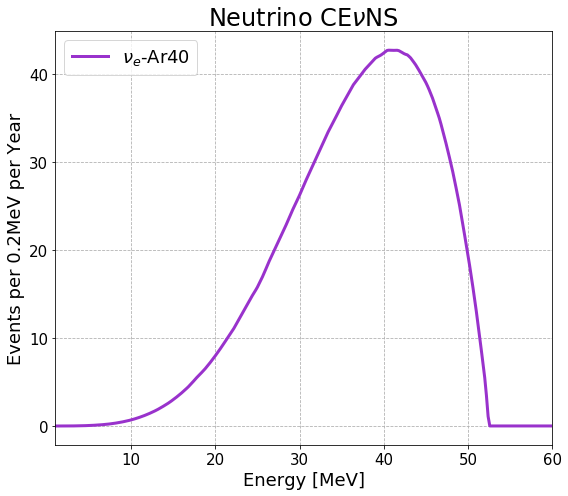

Events per Year --> 4741.684


In [8]:
R_CEVNS   = Nu_Info.Flux_nue  * N_Targets * Nu_Info.XS_nue_Ar
Yr = 365

plt.figure(figsize=(8,7))
plt.title(r"Neutrino CE$\nu$NS", fontsize=24)

plt.plot(Nu_Info.Energy, R_CEVNS*Yr,   label=r"$\nu_e$-Ar40", lw=3, color='darkorchid')
# plt.plot(Nu_Info.Energy, R_CNC2*Yr, label=r"$\overline{\nu}_\mu$-CNC", lw=3, color='darkblue')
# plt.plot(Nu_Info.Energy, R_CNC1*Yr,  label=r"${\nu}_\mu$-CNC", lw=3, color='darkred')

total = (R_CEVNS)*Yr
# plt.plot(Nu_Info.Energy, total, label=r"Total", color='k', lw=3)


plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.xlabel('Energy [MeV]',fontsize=18)
plt.ylabel(r'Events per 0.2MeV per Year',fontsize=18)

plt.xlim(1,60)
plt.tight_layout()
# plt.savefig("Nu_Coherent_NC.pdf")
plt.show()
print("Events per Year --> {:.3f}".format(total.sum()))


In [9]:
## making the CDF for the nu_mu timming
dt = Nu_Info.Timing[1]-Nu_Info.Timing[0]

cdf = np.cumsum(Nu_Info.T_mu*dt)
nor = np.max(cdf)
cdf = cdf/nor

CDF_T_mu = interpolate.interp1d(cdf,Nu_Info.Timing, kind='linear', fill_value="extrapolate")


In [10]:
## making the CDF for the nu_e and nu_mub timming
dt = Nu_Info.Timing[1]-Nu_Info.Timing[0]

cdf = np.cumsum(Nu_Info.T_e_mub*dt)
nor = np.max(cdf)
cdf = cdf/nor

CDF_T_e_mub = interpolate.interp1d(cdf,Nu_Info.Timing, kind='linear', fill_value="extrapolate")


In [11]:
randnum = np.random.uniform(0,1,int(1e6))
e_and_mub = CDF_T_e_mub(randnum)
mu_only = CDF_T_mu(randnum)

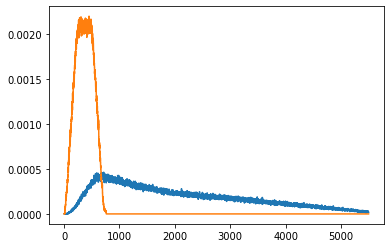

In [12]:
bins = Nu_Info.Timing

hist, bins = np.histogram(e_and_mub, bins=bins, density=True)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.step(center, hist, where='mid')

hist, bins = np.histogram(mu_only, bins=bins, density=True)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
plt.step(center, hist, where='mid')

plt.show()

In [13]:
## making the CDF for the CNC X sections
Yr = 365
R_CNC1   = (Nu_Info.Flux_numu  * N_Targets * Nu_Info.XS_CNC)*Yr
de = Nu_Info.Energy[1]-Nu_Info.Energy[0]

cdf = np.cumsum(R_CNC1*de)
nor = np.max(cdf)
cdf = cdf/nor

CDF_XS_numu = interpolate.interp1d(cdf,Nu_Info.Energy, kind='linear', fill_value="extrapolate")


R_CNC2   = (Nu_Info.Flux_numub  * N_Targets * Nu_Info.XS_CNC)*Yr
de = Nu_Info.Energy[1]-Nu_Info.Energy[0]

cdf = np.cumsum(R_CNC2*de)
nor = np.max(cdf)
cdf = cdf/nor

CDF_XS_numub = interpolate.interp1d(cdf,Nu_Info.Energy, kind='linear', fill_value="extrapolate")


R_CNC3   = (Nu_Info.Flux_nue  * N_Targets * Nu_Info.XS_CNC)*Yr
de = Nu_Info.Energy[1]-Nu_Info.Energy[0]

cdf = np.cumsum(R_CNC3*de)
nor = np.max(cdf)
cdf = cdf/nor

CDF_XS_nue = interpolate.interp1d(cdf,Nu_Info.Energy, kind='linear', fill_value="extrapolate")


In [14]:
Events per Year --> 153.525


Events per Year nue --> 65.609
Events per Year numub --> 87.255
Events per Year numu --> 0.661

SyntaxError: invalid syntax (<ipython-input-14-412adc240ad8>, line 1)

In [57]:
T = []
E = []
for q in range(88*3):
    ran = np.random.uniform(0,1,int(1))[0]
    T.append(CDF_T_e_mub(ran))
    ran = np.random.uniform(0,1,int(1))[0]
    E.append(CDF_XS_nue(ran))
    
for q in range(66*3):
    ran = np.random.uniform(0,1,int(1))[0]
    T.append(CDF_T_e_mub(ran))
    ran = np.random.uniform(0,1,int(1))[0]
    E.append(CDF_XS_numub(ran))
    
for q in range(1*3):
    ran = np.random.uniform(0,1,int(1))[0]
    T.append(CDF_T_mu(ran))
    ran = np.random.uniform(0,1,int(1))[0]
#     E.append(CDF_XS_numu(ran))
    E.append(30)

In [58]:
bins = [np.arange(0, 5000, 100), np.arange(0, 80, 1)]

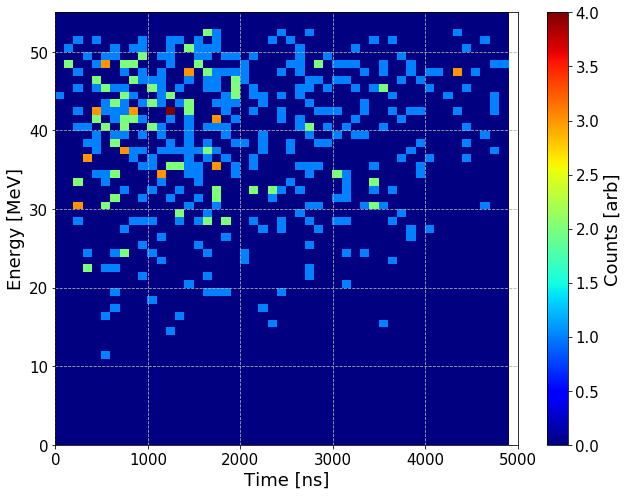

In [59]:
plt.figure(figsize=(9,7))

# plt.hist2d(T, E, bins=bins, cmap=plt.cm.jet, norm=LogNorm())
plt.hist2d(T, E, bins=bins, cmap=plt.cm.jet)

# plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.ylabel('Energy [MeV]',fontsize=18)
plt.xlabel(r'Time [ns]',fontsize=18)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label('Counts [arb]',fontsize=18)

plt.xlim(0,5000)
plt.ylim(0,55)
plt.tight_layout()
# plt.savefig("Nu_Coherent_N C_2dhist.pdf")
plt.show()

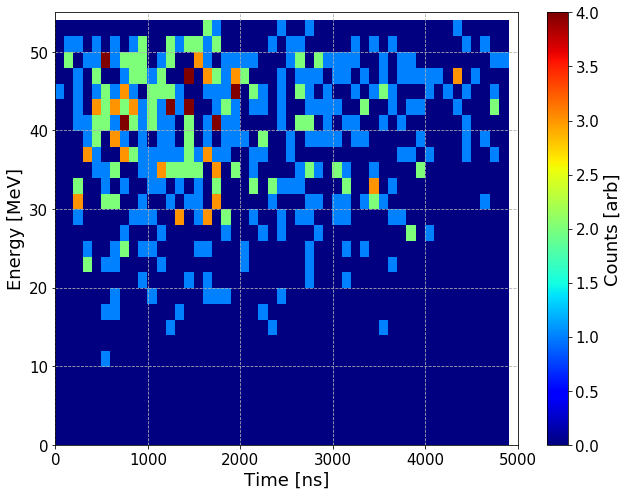

In [62]:
bins = [np.arange(0, 5000, 100), np.arange(0, 55, 2)]

plt.figure(figsize=(9,7))
plt.hist2d(T, E, bins=bins, cmap=plt.cm.jet)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(which="both",linestyle='--')
plt.ylabel('Energy [MeV]',fontsize=18)
plt.xlabel(r'Time [ns]',fontsize=18)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label('Counts [arb]',fontsize=18)

plt.xlim(0,5000)
plt.ylim(0,55)
plt.tight_layout()
# plt.savefig("Nu_Coherent_NC_2dhist.pdf")
plt.show()

In [116]:
np.random.uniform(0,1,int(1e6))

0.3175026641735953